In [446]:
# Sampling
Fs = 1000 # [1/s]
dt = 1/float(Fs) # [s]
L = 3000 # [#samples]
# https://stackoverflow.com/questions/29429733/cant-find-the-right-energy-using-scipy-signal-welch
# http://digital.ni.com/public.nsf/allkb/696CB6C5C815B64B862574E20058ACE3
# http://mathworld.wolfram.com/PowerSpectrum.html
# https://en.wikipedia.org/wiki/Spectral_density
# https://en.wikipedia.org/wiki/Parseval%27s_theorem

In [447]:
# Artificial signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from tftb.generators import noisecu

# -- the signals --
# Amplitude
A = 1

# Frequencies
f1 = 3
f2 = 7
f3 = 12
f4 = 15
f5 = 18

t = np.arange(L)*dt
t2 = np.arange(1500,2500)*dt
t3 = np.arange(1000,2000)*dt
t4 = np.arange(0,1000)*dt

s1 = A*np.sin(2*np.pi*f1*t);
s2 = np.concatenate([ np.zeros(1500), A*np.sin(2*np.pi*f2*t2), np.zeros(500) ])
s3 = np.concatenate([ np.zeros(1000), A*np.sin(2*np.pi*f3*t3), np.zeros(1000) ])
s4 = np.concatenate([ A*np.sin(2*np.pi*f4*t4), np.zeros(2000) ])
s5 = np.concatenate([ A*np.sin(2*np.pi*f5*t) ])

# Analytic complex uniform white noise.
noise = noisecu(L)

S = s1 + s2 + s3 + s4 + s5 + np.absolute(noise)

<IPython.core.display.Javascript object>


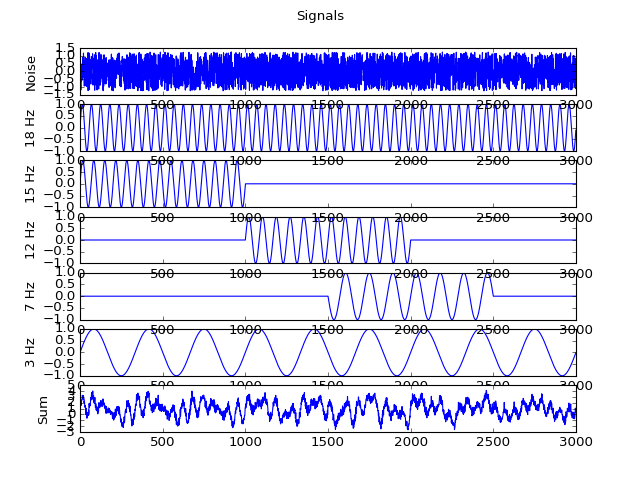

In [448]:
plt.figure(1)
plt.suptitle("Signals")

plt.subplot(7,1,6)
plt.ylabel("3 Hz")
plt.plot(s1)

plt.subplot(7,1,5)
plt.ylabel("7 Hz")
plt.plot(s2)

plt.subplot(7,1,4)
plt.ylabel("12 Hz")
plt.plot(s3)

plt.subplot(7,1,3)
plt.ylabel("15 Hz")
plt.plot(s4)

plt.subplot(7,1,2)
plt.ylabel("18 Hz")
plt.plot(s5)

plt.subplot(7,1,1)
plt.ylabel("Noise")
plt.plot(noise)

plt.subplot(7,1,7)
plt.ylabel("Sum")
plt.plot(S)

<IPython.core.display.Javascript object>


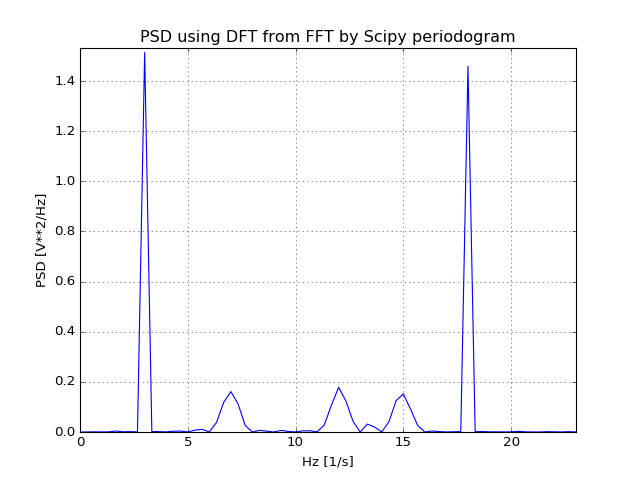

In [449]:
# Power spectral density from scipy

from scipy import signal
f, Pxx_den = signal.periodogram(S, fs=Fs, scaling="density")
plt.figure(2)
plt.grid()
plt.title("PSD using DFT from FFT by Scipy periodogram")
plt.xlabel("Hz [1/s]")
plt.ylabel("PSD [V**2/Hz]")
plt.plot(f, Pxx_den)

<IPython.core.display.Javascript object>


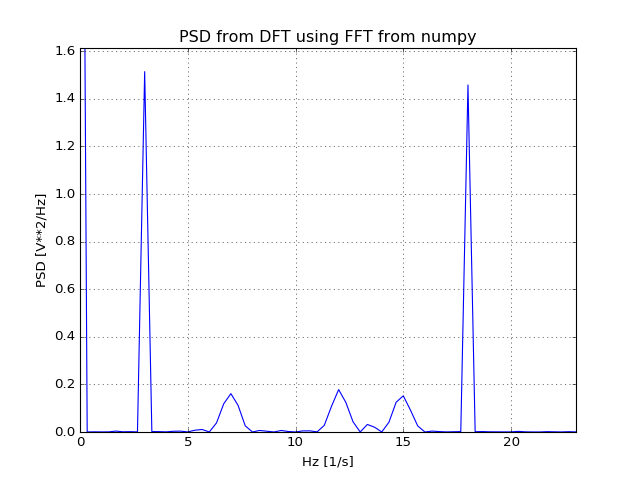

In [450]:
# Power spectral density from DFT using FFT

# Compute DFT
Xk = np.fft.rfft(S)

# Compute corresponding frequencies
f_fft = np.fft.rfftfreq(L, d=dt)


# Compute power spectral density
S_xx_fft = 2 * ( (np.abs(Xk) * dt) ** 2) / (L*dt)


plt.figure(3)
plt.grid()
plt.title("PSD from DFT using FFT from numpy")
plt.xlabel("Hz [1/s]")
plt.ylabel("PSD [V**2/Hz]")
plt.plot(f_fft, S_xx_fft )

##power_density

In [451]:
# Compute power and energy of the signal

# Power
# Integrate PSD over (unit?) spectral bandwidth to obtain signal power `P_fft`
df_fft = f_fft[1] - f_fft[0]
P_fft = np.sum(S_xx_fft) * df_fft


# Energy
# Energy obtained via "integrating" over time
E = np.sum((S - np.mean(S)) ** 2)

# Energy obtained via "integrating" DFT components over frequency.
# The fact that `E` = `E_fft` is the statement of 
# the discrete version of Parseval's theorem.

E_fft = np.sum( (np.abs(Xk)) ** 2 ) / L

print "\nSignal Energy"

print str(E) + " From mean centered signal: E"
print str(E_fft) + " From FFT: E_fft"
print str(P_fft*len(f_fft)) + " From signal power multiplied by frequency range: P_fft*f_fft"
print "\nSignal power"

print str(P_fft) + " From FFT: P_fft" 


Signal Energy
4922.95074837 From mean centered signal: E
5026.13963929 From FFT: E_fft
5029.49039905 From signal power multiplied by frequency range: P_fft*f_fft

Signal power
3.35075975953 From FFT: P_fft


In [452]:
# Time series info
print "Mean: " + str(np.mean(S))
print "Max: " + str(np.max(S))
print "Min: " + str(np.min(S))
print "Length [s]: " + str(L*T)
print "Signal energy: " + str(E)
print "Signal power: " + str(P_fft)

Mean: 0.9246015582
Max: 4.10869635558
Min: -2.62618539214
Length [s]: 3.0
Signal energy: 4922.95074837
Signal power: 3.35075975953
